## PART 1: Collect Tweets and Save into a Local Directory
### - Install Tweepy

In [703]:
# installing tweepy - if it doesn't already exist.
!pip install tweepy

### - Import required libraries
- to read and write into local directory
- to read dataframes
- to fetch tweets

In [704]:
# import needed libs
import os
import pandas as pd
import tweepy as tw

In [705]:
# Twitter credentials for the app
consumer_key = 'wSwpL5RQcPjSUuiTTpV0C1vLp'
consumer_secret = 'Xp1N6m0qOJFmLmcvDFfYjTtAv61QUTpK3PezoZAmYUF5Ae8W8p'
access_key= '4086711688-QU1GXoYbRVFaKk2enoHg8r1d1oCpkSw1DBukqfP'
access_secret = 'emobMy849UMmhbxTna9526AlbjPg4UFGt4aoDNBjujsQV'

### - Login into the twitter API

In [706]:
# pass twitter credentials to tweepy
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tw.API(auth, wait_on_rate_limit=True)

### Search twitter for tweets

According to Slang by Dictionary.com, Karen is a mocking slang term for an entitled, obnoxious, middle-aged white woman. Especially as featured in memes, Karen is generally stereotyped as having a blonde bob haircut, asking to speak to retail and restaurant managers to voice complaints or make demands, and being a nagging, often divorced mother from Generation X.

Source: https://thedmvdaily.com/karenstrikesagain/

#KarenStrikesAgain meme has been shared around social media increasingly in the wake of George Floyd's murder in the hands of cops and the ensuing global protests.

This project will analyze this meme trend.

In [707]:
# Begin by defining the search term and the 'date_since' for start date
search_words = "#KarenStrikesAgain" + "-filter:retweets"  # I don't want retweets
date_since = "2020-01-01"

### - Gather the tweets based on the search term above

In [708]:
# collect tweets
tweets = tw.Cursor(api.search,
                   q=search_words,
                   lang="en",
                   since_id=date_since).items(1000)     # collects 1000 tweets since date_since

### - Setting column headers for the collected tweets.

In [709]:
# breaking down the user tweets into columns of interest
user_tweets = [[tweet.user.screen_name,
             tweet.user.location,
             tweet.user.created_at,
             tweet.text]
    for tweet in tweets]

**Below is a sample of the raw tweets collected:**

In [710]:
# examine the first five tweets
for item in user_tweets[:5]:
    print(item, " \n\n")

['MYSTICMAYH3M', 'North Carolina, USA', datetime.datetime(2011, 7, 30, 22, 21, 2), 'She wants it out there, said it herself. #KarenStrikesAgain https://t.co/9nx6npE9v5']  


['maya_angelou01', 'South Africa', datetime.datetime(2009, 7, 2, 11, 14, 34), 'It’s so amazing how consistent these #Karen’s are ... no matter the country or continent... #KarenStrikesAgain https://t.co/IkQbyZEc1W']  


['aparker70', 'New England', datetime.datetime(2009, 3, 18, 23, 13, 43), 'Absolutely delightful.  Give it a peek #KarenStrikesAgain https://t.co/Fv9c0dewDb']  


['FuckoffKaren1', 'White Male Privilege land! ', datetime.datetime(2020, 5, 22, 8, 53, 54), 'Karen catches her man on the dance floor cutting some moves with a young lady!    #karens #karen #KarenStrikesAgain… https://t.co/FUEaPfm1bq']  


['Nylon09', 'New York, USA', datetime.datetime(2009, 6, 20, 12, 15, 18), 'I feel sorry for her children... Why are all leftists women shriekers?  #AntifaTerrorist #KarenStrikesAgain https://t.co/vlLtkOYBG

### - Placing tweets into a neat Pandas Table

In [711]:
# place user tweets into a pandas data frame
tweet_df = pd.DataFrame(user_tweets,
                        columns=['Username', 'Location', 'Date Created', 'Tweet'])


How many tweets did we collect?

In [712]:
len(tweet_df)

1000

Examine the tweet pandas table of top 20 tweets.

In [415]:
# looking at the top 20 tweets
tweet_df[:20]

,Username,Location,Date Created,Tweet
0,paulclaus,Los Angeles,2009-04-29 06:25:33,"@megynkelly Karen, do you need to speak about ..."
1,swtseptember928,United States,2011-12-21 00:52:38,@JimGaffigan @DebraMessing They’ll make peace ...
2,WVwontWait,"West Virginia, USA",2020-05-01 18:24:30,"@EdiJenkins @WilsonKristiana @jimmy_dore Umm, ..."
3,TrctrDrvngChamp,,2012-04-01 21:29:25,Karen will be a popular #halloween costume. #K...
4,natalie905,DC METRO,2009-03-04 01:11:40,Cheyenne was having a bad day 😱 ☕️ #KarenStrik...
5,NoMatterNews,,2020-06-01 03:18:09,Racist #KarenStrikesAgain https://t.co/yTUiP2Wmd5
6,dessinpendemic,,2019-04-18 15:13:54,@jazzfan71 @tarrimarkel @ThePlumLineGS Then th...
7,Fairdeal2000,United States,2012-10-17 01:45:16,This is what gives America a bad name. #KarenS...
8,Starfishbabiess,,2008-12-23 20:03:21,VIDEO: Denver police hold 3 black children at ...
9,parkingwarrior1,,2020-05-15 16:18:50,"Your TV Talking Head KAREN line up, folks ⬇️\n..."


### - Save tweets into a directory

In [760]:
# export data frame to csv
export_df_csv = tweet_df.to_csv(r"C:\Academics\Scripting for Data Science\Homeworks\Homework 2\karenstrikesagain_tweets.csv", header=True)


## PART 2 - Retrieve Tweets and Analyze
### Analyzing number of **KarenStrikesAgain** tweets over time

**Connect to the tweets csv, read and analyze the data**

In [1817]:
# connect to the csv file and read the tweets
filepath = "C:\Academics\Scripting for Data Science\Homeworks\Homework 2\karenstrikesagain_tweets.csv"
# declare the read object
Read_Obj = pd.read_csv(filepath)

# pass the read object to a data frame
tweet_df = pd.DataFrame(Read_Obj)

# test if the read was a success
tweet_df[:2]

,Unnamed: 0,Unnamed: 0.1,Username,Location,Date Created,Tweet
0,0,0,MYSTICMAYH3M,"North Carolina, USA",2011-07-30 22:21:02,"She wants it out there, said it herself. #Kare..."
1,1,1,maya_angelou01,South Africa,2009-07-02 11:14:34,It’s so amazing how consistent these #Karen’s ...


**Make sure that the date column is actually a datetime data format.**

In [1818]:
#Examining the column datatypes from the dataframe

tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
Unnamed: 0      1000 non-null int64
Unnamed: 0.1    1000 non-null int64
Username        1000 non-null object
Location        713 non-null object
Date Created    1000 non-null object
Tweet           1000 non-null object
dtypes: int64(2), object(4)
memory usage: 47.0+ KB


In [1819]:
# Username, location, and tweet should be string
# Date Created should be datetime

tweet_df["Date Created"] =  pd.to_datetime(tweet_df["Date Created"])

In [1820]:
# get a subset of tweets by dates only
tweet_date_count = tweet_df[["Date Created", "Tweet"]]
tweet_date_count

,Date Created,Tweet
0,2011-07-30 22:21:02,"She wants it out there, said it herself. #Kare..."
1,2009-07-02 11:14:34,It’s so amazing how consistent these #Karen’s ...
2,2009-03-18 23:13:43,Absolutely delightful. Give it a peek #KarenS...
3,2020-05-22 08:53:54,Karen catches her man on the dance floor cutti...
4,2009-06-20 12:15:18,I feel sorry for her children... Why are all l...
...,...,...
995,2009-08-21 21:54:41,Nahhhh you get 2 retweets shorty #KarenStrikes...
996,2019-06-14 15:07:01,Shame on you #Karen #karensgonewild #KarenStri...
997,2011-05-11 02:16:52,@Gennefer You could have stayed home. They don...
998,2011-04-29 11:38:40,@JoeKinseyexp I always knew the little old lad...


**Break down the tweets to years, months and hours**

In [1821]:
# processing for yearly tweets
# Change the Date column to show only the year from the datetime
the_years = [tweet_date_count["Date Created"][item].year for item in tweet_date_count.index]

# processing for Monthly tweets
# Change the Date column to show only the Month from the datetime
the_months = [tweet_date_count["Date Created"][item].month for item in tweet_date_count.index]

# processing for hourly tweets
# Change the Date column to show only the Hours from the datetime
the_hours = [tweet_date_count["Date Created"][item].hour for item in tweet_date_count.index]

**Place tweets into a list**

In [1822]:
tweets = []
for tweet in tweet_date_count.index:
    tweets.append(tweet_date_count["Tweet"][tweet])

# view first three tweets in the list
tweets[:3]

['She wants it out there, said it herself. #KarenStrikesAgain https://t.co/9nx6npE9v5',
 'It’s so amazing how consistent these #Karen’s are ... no matter the country or continent... #KarenStrikesAgain https://t.co/IkQbyZEc1W',
 'Absolutely delightful.  Give it a peek #KarenStrikesAgain https://t.co/Fv9c0dewDb']

### - Examine Tweets over the Years

In [1823]:
# now combine tweets and years into a new dataframe
df =  pd.DataFrame(list(zip(the_years,tweets)), columns = ["Year","Tweet"])

# view the first 100 items
df[:100]

,Year,Tweet
0,2011,"She wants it out there, said it herself. #Kare..."
1,2009,It’s so amazing how consistent these #Karen’s ...
2,2009,Absolutely delightful. Give it a peek #KarenS...
3,2020,Karen catches her man on the dance floor cutti...
4,2009,I feel sorry for her children... Why are all l...
...,...,...
95,2020,This Karen does the simple things well! finger...
96,2019,Uh oh looks like we have a Karen causing Torra...
97,2015,"Tonight, We dine on the tears of #Karen\nhttps..."
98,2011,"This has really upset me. WTF?? \n\nAlso, what..."


In [1824]:
# group tweets by year
grouped_df = df.groupby(["Year","Tweet"]).size().reset_index(name="counts")

# convert year to numeric/int
grouped_df["Year"] = grouped_df["Year"].astype(int)

In [1825]:
# look at individual tweet counts
grouped_df[["Year", "counts"]]

,Year,counts
0,2006,1
1,2007,1
2,2007,1
3,2007,1
4,2007,1
...,...,...
995,2020,1
996,2020,1
997,2020,1
998,2020,1


### - Chronology of #KarenStrikesAgain

In [1826]:
the_years = []
for item in grouped_df["Year"]:
    the_years.append(item)

#sorted_years = the_years.sort()

# the latest year tweeted
max_year = max(the_years)

# the oldest year tweeted
min_year = min(the_years)

# how many years are covered in the tweets?
num_years = (int(max_year) - int(min_year))

print(num_years, max_year, min_year)

14 2020 2006


The earliest reported **#KarenStrikesAgain** tweet was back in 2006 with the most recent one - obviously - in 2020. Thus, the tweet data suggests 14 pesistent years of #KarenStrikesAgain 

### #KarenStrikesAgain ....over the years

In [1827]:
# what are the years
sorted_year = set(the_years)
sorted_year = list(sorted_year)

In [1828]:
# print each year and the count of tweets
tweet_count = []
for item in sorted_year:
    # subset tweets for a specific year
    y = grouped_df[grouped_df["Year"] == item]
    tweet_count.append(sum(y["counts"]))

print(tweet_count)

[65, 61, 48, 85, 164, 1, 6, 56, 165, 58, 82, 89, 49, 37, 34]


In [1829]:
# hold both lists in a single dictionary
plt_dict = {"Years":sorted_year, "Tweet Counts":tweet_count}

# combine both years and tweet counts into a single data frame
plt_df = pd.DataFrame(plt_dict)

# sort values by years column
plt_df = plt_df.sort_values("Years")

plt_df

,Years,Tweet Counts
5,2006,1
6,2007,6
7,2008,56
8,2009,165
9,2010,58
10,2011,82
11,2012,89
12,2013,49
13,2014,37
14,2015,34


**Plotting #KarenStrikesAgain over the years**

In [1830]:
# prepare to plot
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-poster') #sets the size of the charts
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

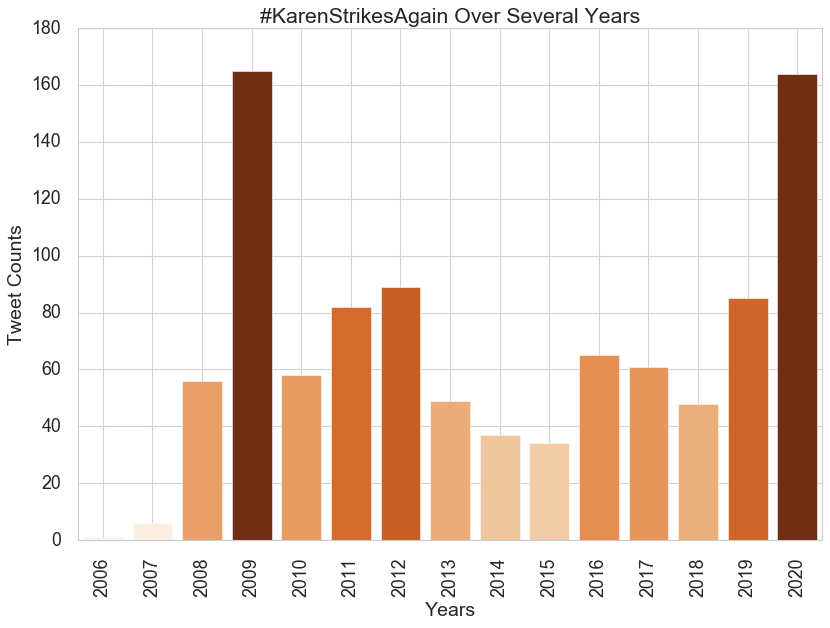

In [1831]:
# plotting: color map used to emphasize gradient based on tweet counts
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Years", y="Tweet Counts", data=plt_df, palette=cm.Oranges(plt_df['Tweet Counts']*2), order=plt_df['Years'])
plt.xticks(rotation='vertical')
plt.title("#KarenStrikesAgain Over Several Years")
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

### - Examine Tweets over the Months

In [1832]:
# processing for monthly tweets
# now combine tweets and months into a new dataframe
df =  pd.DataFrame(list(zip(the_months,tweets)), columns = ["Month","Tweet"])

# view the first 100 items
df[:100]

,Month,Tweet
0,7,"She wants it out there, said it herself. #Kare..."
1,7,It’s so amazing how consistent these #Karen’s ...
2,3,Absolutely delightful. Give it a peek #KarenS...
3,5,Karen catches her man on the dance floor cutti...
4,6,I feel sorry for her children... Why are all l...
...,...,...
95,6,This Karen does the simple things well! finger...
96,12,Uh oh looks like we have a Karen causing Torra...
97,4,"Tonight, We dine on the tears of #Karen\nhttps..."
98,3,"This has really upset me. WTF?? \n\nAlso, what..."


In [1833]:
# group tweets by month
grouped_df = df.groupby(["Month","Tweet"]).size().reset_index(name="counts")

# convert month to numeric/int
grouped_df["Month"] = grouped_df["Month"].astype(int)

# look at individual tweet counts
grouped_df[["Month", "counts"]]

,Month,counts
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
995,12,1
996,12,1
997,12,1
998,12,1


In [1834]:
# what are the months
sorted_month = set(the_months)
sorted_month = list(sorted_month)

# print each month and the count of tweets
tweet_count = []
for item in sorted_month:
    # subset tweets for a specific year
    y = grouped_df[grouped_df["Month"] == item]
    tweet_count.append(sum(y["counts"]))

print(tweet_count)

# hold both lists in a single dictionary
plt_dict = {"Month":sorted_month, "Tweet Counts":tweet_count}

# combine both months and tweet counts into a single data frame
plt_df = pd.DataFrame(plt_dict)

# sort values by month column
plt_df = plt_df.sort_values("Month")

plt_df

[66, 76, 93, 85, 106, 117, 69, 68, 81, 75, 86, 78]


,Month,Tweet Counts
0,1,66
1,2,76
2,3,93
3,4,85
4,5,106
5,6,117
6,7,69
7,8,68
8,9,81
9,10,75


**Plotting #KarenStrikesAgain over the months**

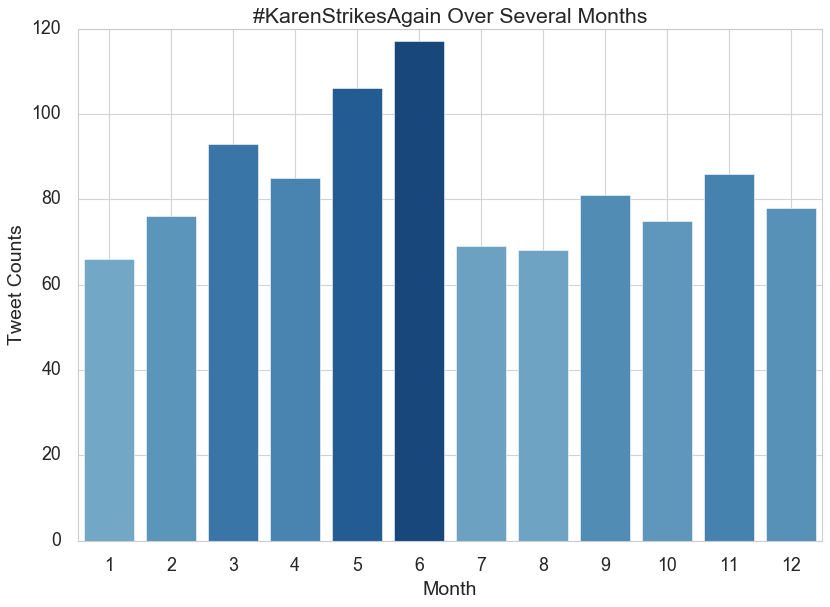

In [1835]:
# plotting: color map used to emphasize gradient based on tweet counts
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Month", y="Tweet Counts", data=plt_df, palette=cm.Blues(plt_df['Tweet Counts']*2), order=plt_df['Month'])
plt.xticks(rotation='horizontal')
plt.title("#KarenStrikesAgain Over Several Months")
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

### - Examine Tweets over the Hours

In [1836]:
# processing for hourly tweets
# now combine tweets and hours into a new dataframe
df =  pd.DataFrame(list(zip(the_hours,tweets)), columns = ["Hour","Tweet"])

# view the first 100 items
df[:100]

,Hour,Tweet
0,22,"She wants it out there, said it herself. #Kare..."
1,11,It’s so amazing how consistent these #Karen’s ...
2,23,Absolutely delightful. Give it a peek #KarenS...
3,8,Karen catches her man on the dance floor cutti...
4,12,I feel sorry for her children... Why are all l...
...,...,...
95,22,This Karen does the simple things well! finger...
96,16,Uh oh looks like we have a Karen causing Torra...
97,7,"Tonight, We dine on the tears of #Karen\nhttps..."
98,22,"This has really upset me. WTF?? \n\nAlso, what..."


In [1837]:
# group tweets by hours
grouped_df = df.groupby(["Hour","Tweet"]).size().reset_index(name="counts")

# convert hours to numeric/int
grouped_df["Hour"] = grouped_df["Hour"].astype(int)

# look at individual tweet counts
grouped_df[["Hour", "counts"]]

,Hour,counts
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
995,23,1
996,23,1
997,23,1
998,23,1


In [1838]:
# what are the Hours
sorted_hr = set(the_hours)
sorted_hr = list(sorted_hr)

# print each hour and the count of tweets
tweet_count = []
for item in sorted_hr:
    # subset tweets for a specific year
    y = grouped_df[grouped_df["Hour"] == item]
    tweet_count.append(sum(y["counts"]))

print(tweet_count)

# hold both lists in a single dictionary
plt_dict = {"Hour":sorted_hr, "Tweet Counts":tweet_count}

# combine both years and tweet counts into a single data frame
plt_df = pd.DataFrame(plt_dict)

# sort values by years column
plt_df = plt_df.sort_values("Hour")

plt_df

[64, 43, 59, 34, 40, 39, 26, 19, 29, 25, 15, 43, 34, 25, 32, 44, 44, 44, 59, 83, 46, 63, 43, 47]


,Hour,Tweet Counts
0,0,64
1,1,43
2,2,59
3,3,34
4,4,40
5,5,39
6,6,26
7,7,19
8,8,29
9,9,25


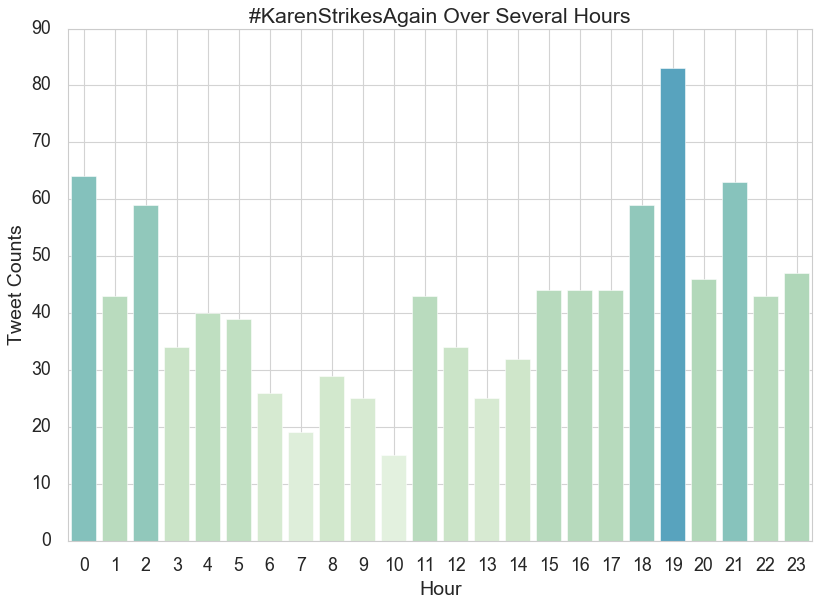

In [1839]:
# plotting: color map used to emphasize gradient based on tweet counts
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Hour", y="Tweet Counts", data=plt_df, palette=cm.GnBu(plt_df['Tweet Counts']*2), order=plt_df['Hour'])
plt.xticks(rotation='horizontal')
plt.title("#KarenStrikesAgain Over Several Hours")
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

## PART 3: Text Mining

### -Tokenization

In [1840]:
# required Libraries
import nltk
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk import FreqDist
nltkstopwords = nltk.corpus.stopwords.words('english')

**Generate the total corpus of tweets**

In [1841]:
# the complete corpus
tweet_corpus = ""
for tweet in tweet_df["Tweet"]:
    tweet_corpus = tweet_corpus + tweet + ' '

View the first 200 characters in the corpus of tweets

In [1842]:
# first 200 characters of the tweet corpus
tweet_corpus[:240]

'She wants it out there, said it herself. #KarenStrikesAgain https://t.co/9nx6npE9v5 It’s so amazing how consistent these #Karen’s are ... no matter the country or continent... #KarenStrikesAgain https://t.co/IkQbyZEc1W Absolutely delightful'

**What are the word tokens used in #KarenStrikesAgain?**

In [1843]:
tweet_tokens = nltk.word_tokenize(tweet_corpus) # split sentence into word tokens
print("\nThere are {} raw tokens".format(len(tweet_tokens)))


There are 21542 raw tokens


**Use RegEx to clean the raw tokens**

From the tweet corpus, remove URLs, remove special characters, remove #KarenStrikesAgain and any other hashatags in the text

In [1844]:
clean_tokens = []
for token in tweet_tokens:
    text = token.lower()                            # make everything lowercase
    text = re.sub(r"(^.*\/).*", "", text)           # web address / URLs
    text = re.sub(r"[^0-9a-zA-Z\:\s]+", "", text)   # remove special characters from the tweet
    text = re.sub(r"karenstrikesagain", "", text)  # remove KarenStrikesAgain hashtag
    tex = re.sub(r"\n","", text)
    clean_tokens.append(text)    

In [1845]:
# view the first 50 characters to see the token splits
print(clean_tokens[:50])

print("\nThere are {} clean tokens".format(len(clean_tokens)))

['she', 'wants', 'it', 'out', 'there', '', 'said', 'it', 'herself', '', '', '', 'https', ':', '', 'it', '', 's', 'so', 'amazing', 'how', 'consistent', 'these', '', 'karen', '', 's', 'are', '', 'no', 'matter', 'the', 'country', 'or', 'continent', '', '', '', 'https', ':', '', 'absolutely', 'delightful', '', 'give', 'it', 'a', 'peek', '', '']

There are 21542 clean tokens


In [1846]:
# additional cleaning removes zero to two letter words/tokens
cleaner_tokens = []
for item in clean_tokens:
    if len(item) <= 2:
        continue
    cleaner_tokens.append(item)
    
print("\nThere are {} tokens after additional cleaning".format(len(cleaner_tokens)))


There are 11926 tokens after additional cleaning


In [1847]:
#Remove Stopwords
morestopwords = ["https","http", "Fuck","Shit","Bitch"]
stopwords = nltkstopwords + morestopwords

stoppedtokens = [w for w in cleaner_tokens if not w in stopwords]
print("\nThere are {} tokens after removing stop words".format(len(stoppedtokens)))

# print first 20 tokens to inspect structure
stoppedtokens[:20]


There are 7752 tokens after removing stop words


['wants',
 'said',
 'amazing',
 'consistent',
 'karen',
 'matter',
 'country',
 'continent',
 'absolutely',
 'delightful',
 'give',
 'peek',
 'karen',
 'catches',
 'man',
 'dance',
 'floor',
 'cutting',
 'moves',
 'young']

### - Wordcloud

A wordcloud gives us indication of the most commonly used words with #KarenStrikesAgain

In [1848]:
# begin by converting the clean tokens back into a sentence
clean_sentence = ""
for token in stoppedtokens:
    clean_sentence = clean_sentence + token + " "

In [1849]:
# view the clean_sentence
clean_sentence[:500]

'wants said amazing consistent karen matter country continent absolutely delightful give peek karen catches man dance floor cutting moves young lady karens karen feel sorry children leftists women shriekers antifaterrorist russian karen believe covid19 karens karen karensgonewild yet another kkkaren racist biatches allowed slap hard use kiirowulf funny know leave karen dont work fckn kkkaren racially abusing peeps gets suitable kicking karens karen katiebr22129903 rexchapman another kkkaren suppo'

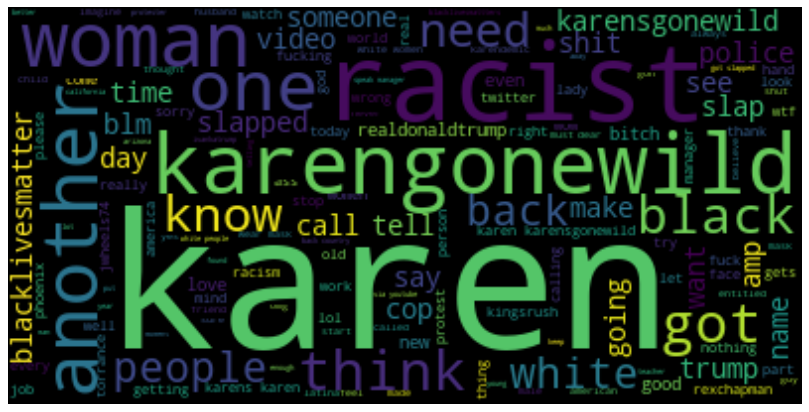

In [1850]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(clean_sentence)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

It is not a surprise that the word Karen is the most abundant word in the corpus. It is also evident that this meme #KarenStrikesAgain has something to do wtih racism.

**Frequency distribution of tokens used with #KarenStrikesAgain**

First, create a frequency distribution of words:

In [1760]:
# Creating a frequency distribution of words
ndist = FreqDist(stoppedtokens)

Since the list is very long, below is a subset containing 30 tokens most common in the corpus.

In [1767]:
# print the top 30 tokens by frequency
nitems = ndist.most_common(30)
for item in nitems:
    print (item[0], '\t', item[1])

karen 	 524
karens 	 127
racist 	 85
karengonewild 	 57
got 	 55
another 	 51
people 	 50
woman 	 49
karensgonewild 	 48
white 	 48
black 	 42
one 	 42
slapped 	 41
like 	 37
back 	 37
get 	 36
think 	 35
police 	 31
know 	 28
blacklivesmatter 	 26
someone 	 25
women 	 24
slap 	 24
see 	 24
amp 	 24
time 	 23
would 	 23
need 	 22
trump 	 21
name 	 21


By converting this list into a dataframe, it becomes more easily usable in other areas.

In [1852]:
# convert nitems into a dataframe so that it can be used elsewhere
nitems_df = pd.DataFrame(nitems, columns=["Token","Count"])

In [1853]:
nitems_df

,Token,Count
0,karen,524
1,karens,127
2,racist,85
3,karengonewild,57
4,got,55
5,another,51
6,people,50
7,woman,49
8,karensgonewild,48
9,white,48


**Plotting the most common words in #KarenStrikesAgain**

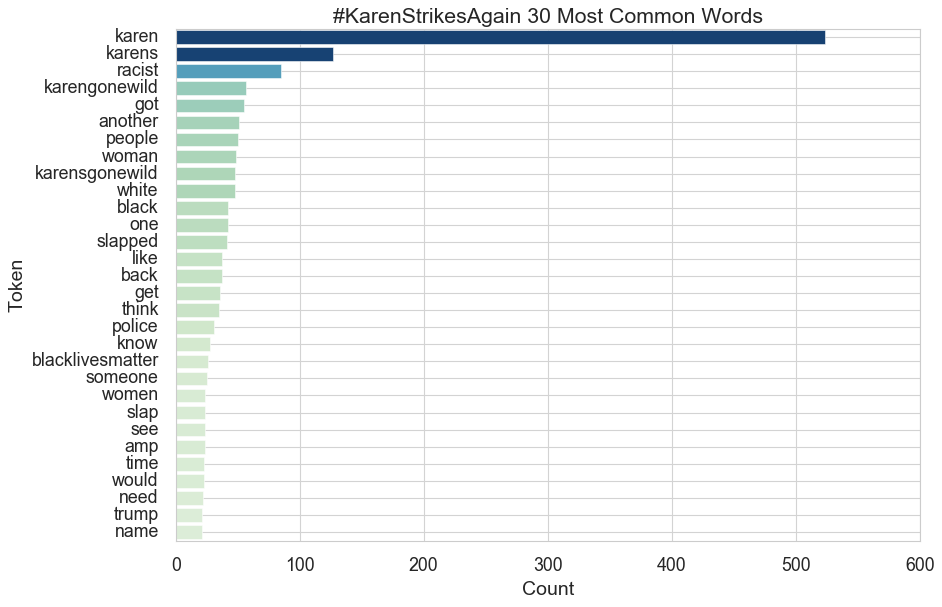

In [1854]:
# plotting: color map used to emphasize gradient based on tweet counts
plt.figure(figsize=(12,8))
ax = sns.barplot(x="Count", y="Token", data=nitems_df, palette=cm.GnBu(nitems_df['Count']*2), order=nitems_df['Token'])
plt.xticks(rotation='horizontal')
plt.title("#KarenStrikesAgain 30 Most Common Words")
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

## PART 4: Sentiment Analysis

This section looks at the clean corpus from the tweet collection of #KarenStrikesAgain to understand sentiments therein.

**Parts of Speech Tagging**

In [1855]:
# parts of speech tagging for each word/token
pos = nltk.pos_tag(stoppedtokens)

In [1856]:
# display the first 20 words tagged
pos[:20]

[('wants', 'VBZ'),
 ('said', 'VBD'),
 ('amazing', 'JJ'),
 ('consistent', 'JJ'),
 ('karen', 'NNS'),
 ('matter', 'RBR'),
 ('country', 'NN'),
 ('continent', 'NN'),
 ('absolutely', 'RB'),
 ('delightful', 'JJ'),
 ('give', 'JJ'),
 ('peek', 'NN'),
 ('karen', 'NN'),
 ('catches', 'VBZ'),
 ('man', 'NN'),
 ('dance', 'NN'),
 ('floor', 'NN'),
 ('cutting', 'VBG'),
 ('moves', 'NNS'),
 ('young', 'JJ')]

While the foregoing section shows a few of the words and tags, the following section summarizes the distribution of tags in the entire bag of words/corpus.

**- What are the tags?**

In [1857]:
# enumerating the tags
tag_freqDist = nltk.FreqDist(tag for (word,tag) in pos)
print(tag_freqDist.keys())

dict_keys(['VBZ', 'VBD', 'JJ', 'NNS', 'RBR', 'NN', 'RB', 'VBG', 'VB', 'VBP', 'DT', 'NNP', 'CD', 'VBN', 'IN', 'FW', 'RP', 'CC', 'MD', 'WDT', 'JJS', 'WP', 'WP$', 'JJR', 'TO', 'PRP'])


**- What is the distribution of these POS tags?**

In [1858]:
# a table showing the distrubution of tags
tag_freqDist_df = pd.DataFrame(tag_freqDist, index = ["Tag"])
tag_freqDist_df

,VBZ,VBD,JJ,NNS,RBR,NN,RB,VBG,VB,VBP,...,RP,CC,MD,WDT,JJS,WP,WP$,JJR,TO,PRP
Tag,228,352,1507,954,11,2527,388,373,225,585,...,12,5,49,3,19,3,3,20,2,2


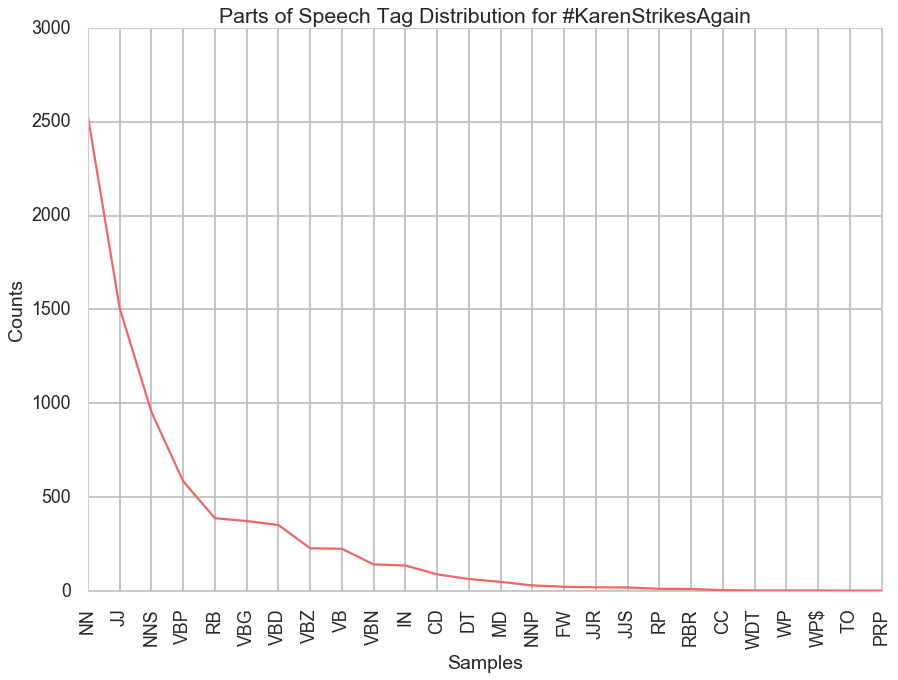

In [1859]:
tag_freqDist.plot(title="Parts of Speech Tag Distribution for #KarenStrikesAgain")

**- Groups/Classes of Tags**

In [1860]:
# groups/classes of tags
tagClasses_freqDist = nltk.FreqDist(tag[0] for (word,tag) in pos)
print(tag_freqDist.keys(),'\n')

for tag,freq in tagClasses_freqDist.most_common():
    print(tag, freq)

dict_keys(['VBZ', 'VBD', 'JJ', 'NNS', 'RBR', 'NN', 'RB', 'VBG', 'VB', 'VBP', 'DT', 'NNP', 'CD', 'VBN', 'IN', 'FW', 'RP', 'CC', 'MD', 'WDT', 'JJS', 'WP', 'WP$', 'JJR', 'TO', 'PRP']) 

N 3511
V 1905
J 1546
R 411
I 136
C 94
D 64
M 49
F 23
W 9
T 2
P 2


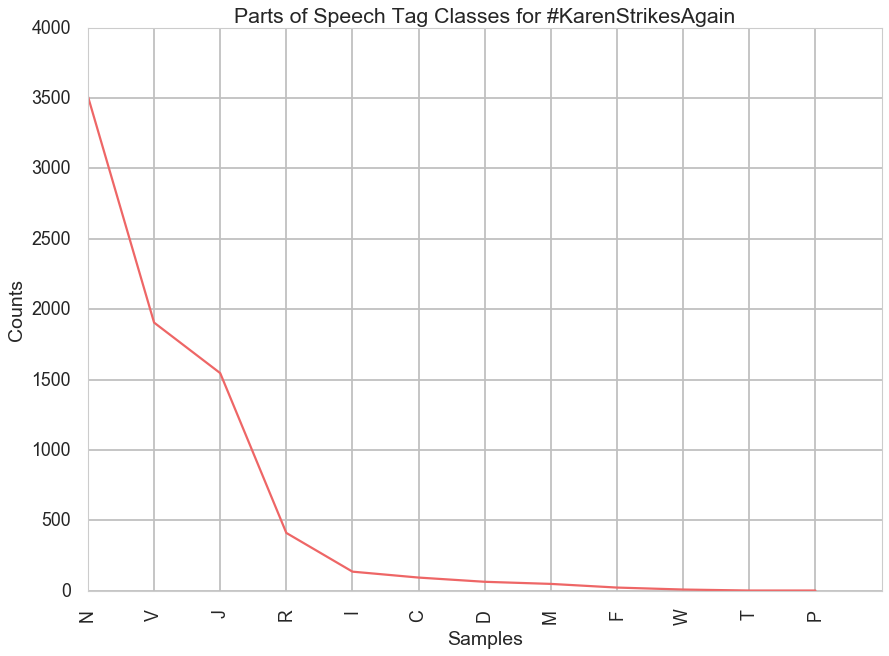

In [1861]:
tagClasses_freqDist.plot(title="Parts of Speech Tag Classes for #KarenStrikesAgain")

**- Positive, Negative or Neutral?**

In [1862]:
tweet_sentences = nltk.sent_tokenize(tweet_corpus) # split sentence into sentence tokens
print("\nThere are {} raw sentences".format(len(tweet_sentences)))


There are 848 raw sentences


In [1863]:
tweet_sentences[:10]

['She wants it out there, said it herself.',
 '#KarenStrikesAgain https://t.co/9nx6npE9v5 It’s so amazing how consistent these #Karen’s are ... no matter the country or continent... #KarenStrikesAgain https://t.co/IkQbyZEc1W Absolutely delightful.',
 'Give it a peek #KarenStrikesAgain https://t.co/Fv9c0dewDb Karen catches her man on the dance floor cutting some moves with a young lady!',
 '#karens #karen #KarenStrikesAgain… https://t.co/FUEaPfm1bq I feel sorry for her children... Why are all leftists women shriekers?',
 '#AntifaTerrorist #KarenStrikesAgain https://t.co/vlLtkOYBGX Russian Karen does not believe in COVID19!',
 '#karens #karen #KarenStrikesAgain #karensgonewild https://t.co/d93ny6ip8T Yet another KKKaren!',
 'What is it with these racist biatches?',
 'you should be allowed to slap em hard if the use the N… https://t.co/uOr1dqVmhy @kiirowulf Funny AF, "know you can leave" #Karen , you dont work there😂 \nFckn #KarenStrikesAgain KKKaren be racially abusing peeps again... she

In [1864]:
clean_tweet_sentences = []
for sentence in tweet_sentences:
    text = sentence.lower()                         # make everything lowercase
    #text = re.sub("(^.\/).*", "", text)           # web address / URLs
    text = re.sub(r"(^.*\/).*", "", text)           # web address / URLs
    text = re.sub(r"\n", "", text)
    text = re.sub(r"[^0-9a-zA-Z\:\s]+", "", text)   # remove special characters from the tweet
    text = re.sub(r"karenstrikesagain", "", text)  # remove KarenStrikesAgain hashtag
    clean_tweet_sentences.append(text)

In [1865]:
clean_tweet_sentences[:10]

['she wants it out there said it herself',
 '',
 '',
 '',
 '',
 '',
 'what is it with these racist biatches',
 'fckn  kkkaren be racially abusing peeps again she gets a suitable kicking karens karen  https:tcolejsqggqqb katiebr22129903 rexchapman another kkkaren supporting another kkkaren what shock   https:tcodpdqtftbud black karen here is moaning about the water fight to the cops',
 'lol dum biatch',
 '']

In [1866]:
# additional cleaning removes zero lenghth sentences
cleaner_tweet_sentences = []
for item in clean_tweet_sentences:
    if len(item) == 0:
        continue
    cleaner_tweet_sentences.append(item)
    
print("\nThere are {} sentences after additional cleaning".format(len(cleaner_tweet_sentences)))


There are 444 sentences after additional cleaning


In [1867]:
cleaner_tweet_sentences[:10]

['she wants it out there said it herself',
 'what is it with these racist biatches',
 'fckn  kkkaren be racially abusing peeps again she gets a suitable kicking karens karen  https:tcolejsqggqqb katiebr22129903 rexchapman another kkkaren supporting another kkkaren what shock   https:tcodpdqtftbud black karen here is moaning about the water fight to the cops',
 'lol dum biatch',
 'there are alot more karens than we imagined',
 ' karengonewild karens karen https:tcocbg7huwurk blacktwitter blacklivesmatter  karenoftheyear torrance california',
 'racistsocalledminoritysocialdistancing socal https:tcozbjovyb8oa goddammit karen this is a truly racist one we have here',
 'karensinthewild karensgonewild  karendemic nbcsandiego another karen ugh and she drinks too much',
 'one day',
 'that is exactly whats going to happen']

In [1868]:
from textblob import TextBlob

In [1869]:
print("Polarity \t \t \t Subjectivity \t \t \t")

Polarity 	 	 	 Subjectivity 	 	 	


### - Subjectivity of #KarenStrikesAgain tweets

The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [1870]:
# Investigating subjectivity
subjectivity = []
for sentence in cleaner_tweet_sentences:
    sents = TextBlob(sentence)
    #print(sentence[:40], "\t", sents.sentiment.polarity)
    subjectivity.append(sents.sentiment.subjectivity)

    
# convert into a sigle dictionary, and a dataframe
sentiment_dict = {"Sentence" : cleaner_tweet_sentences, "Subjectivity" : subjectivity} 
sentiment_df = pd.DataFrame(sentiment_dict, columns=["Sentence","Subjectivity"])
sentiment_df

,Sentence,Subjectivity
0,she wants it out there said it herself,0.100000
1,what is it with these racist biatches,0.000000
2,fckn kkkaren be racially abusing peeps again ...,0.477778
3,lol dum biatch,0.700000
4,there are alot more karens than we imagined,0.500000
...,...,...
439,blacklivesmatter karen whiteprivilege https:t...,0.600000
440,they dont need you to decide for them,0.000000
441,joekinseyexp i always knew the little old lad...,0.350000
442,thebigsadness karengw44 bradbelair you just w...,0.000000


### -Very Subjective Tweets (Negative Tweets)

In [1871]:
###-Very Subjective Tweets
subjective_count = sentiment_df[sentiment_df["Subjectivity"] == 0]
subjective_count

,Sentence,Subjectivity
1,what is it with these racist biatches,0.0
5,karengonewild karens karen https:tcocbg7huwur...,0.0
6,racistsocalledminoritysocialdistancing socal h...,0.0
8,one day,0.0
10,just stressing for nothing,0.0
...,...,...
436,in the 70s feminists calle https:tcorxleluf9fc...,0.0
437,so closenot,0.0
440,they dont need you to decide for them,0.0
442,thebigsadness karengw44 bradbelair you just w...,0.0


### -Very Objective Tweets (Positive Tweets)

In [1872]:
# negative
objective_count = sentiment_df[sentiment_df["Subjectivity"] == 1]
objective_count

,Sentence,Subjectivity
19,id be mad too,1.0
42,wtf,1.0
44,fireher racistexposed https:tcoqte0vq7lar kar...,1.0
48,how awful,1.0
52,wow,1.0
89,this woman is outraged about voting in georgia...,1.0
96,karensgonewild https:tconalmdorfob make her fa...,1.0
131,just how selfish can you possibly be,1.0
160,icecold and refreshing,1.0
169,funny and b,1.0


In [1873]:
# total number of tweets observed
all_tweets = len(sentiment_df)
subjective_tweets = len(subjective_count)
objective_tweets = len(objective_count)

# proportion of objective tweets
obj_prop = round((objective_tweets / all_tweets) * 100)

print("There were only {}% positive tweets".format(obj_prop))

There were only 5% positive tweets
